<a href="https://colab.research.google.com/github/LizzetClifton/MathApp/blob/master/SUM%2BMIT_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preprocessing Phase

###This is all the preprocessing necessary for the model. You must perform all these preprocessing steps so that you can have the final clean datasets that will be used to train and test the model (inverted_df and inverted_test_df).

## Digits preprocessing

In [0]:
# Import all necessary packages
from zipfile import ZipFile
from sklearn.datasets import load_files
import matplotlib.pyplot as plt 
import pandas as pd
import cv2
import math

In [0]:
with ZipFile("mnist-60000-hand-written-number-images.zip", "r" ) as zipObj:
    zipObj.extractall()

In [0]:
# Read in csv's containing train and test digits datasets
train_digits = pd.read_csv('./mnist_train.csv')
test_digits = pd.read_csv('./mnist_test.csv')

In [0]:
# We need to rename the columns, but first we'll extract the first column of the train df which is the target columns

target = train_digits['5']
target.rename("Target")
target.head()


0    0
1    4
2    1
3    9
4    2
Name: 5, dtype: int64

In [0]:
# Extract the first column of the tests df which is the target columns

target1 = test_digits['7']
target1.rename("Target")
target1.head()

0    2
1    1
2    0
3    4
4    1
Name: 7, dtype: int64

In [0]:
train_digits.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's drop the column we extracted to make renaming easier
train_digits.drop(columns=['5'], inplace=True)
train_digits.head()

# Do the same for test df
test_digits.drop(columns=['7'], inplace=True)

In [0]:
# Normalizing and inverting the colors
train_digits = train_digits/255
train_digits = abs(1-train_digits)

test_digits = test_digits/255
test_digits = abs(1-test_digits)

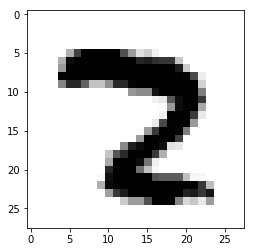

In [0]:
image_to_view = 27

plt.imshow(
 train_digits.iloc[image_to_view][train_digits.columns.values].values.reshape(28,28),
 cmap='gray')
plt.show()

In [0]:
# Rename all the columns by their pixel number
train_digits.columns = list(range(784))
  
# Same for test df
test_digits.columns = list(range(784))

In [0]:
# Rename and append target column back to the dataframe
train_digits['Target'] = target

# Same for test df
test_digits['Target'] = target1
train_digits.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,Target
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.011765,0.835294,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2


In [0]:
# Making test and train digits into a csv for faster loading in
# in the future (so you only have to do this once and then you can
# skip all the cells before this when running again).

train_digits.to_csv('train_digits.csv', index=False)
test_digits.to_csv('test_digits.csv', index=False)

## Exploratory Data Analysis

In [0]:
train_digits.describe()

In [0]:
test_digits.describe()

In [0]:
# Let's check if there are any NaN values in the dataset
train_digits.isnull().any(axis=1).sum()

In [0]:
test_digits.isnull().any(axis=1).sum()

In [0]:
train_digits.duplicated().sum() > 0

In [0]:
test_digits.duplicated().sum() > 0

##Math Symbols Preprocessing

In [0]:
# Import all necessary packages for the math symbols dataset
from zipfile import ZipFile
from sklearn.datasets import load_files
import matplotlib.pyplot as plt 
import pandas as pd
import cv2
import math
import imageio
import numpy as np
import os

In [0]:
# Install necessary packages
!pip install patool
!pip install pyunpack
import patoolib

In [0]:
from pyunpack import Archive
Archive('handwrittenmathsymbols.zip').extractall('/')

import patoolib
patoolib.extract_archive("data.rar")

In [0]:
!pip install unrar

In [0]:
brew install unrar

In [0]:
!pip install rarfile

In [0]:
from unrar import rarfile
rar = rarfile.RarFile('data.rar')
rar.namelist()

from rarfile import RarFile

with RarFile("data.rar") as rf:
    for f in rf.infolist():
        with open(f.filename, "wb") as of:
            of.write(rf.read(f))

In [0]:
# Deleting duplicates from file
def deletefromfolder(path):
    datadir = path
    print('Directory:', datadir)

    rmmap = dict()
    total = 0
    repeatcnt = 0
    for root, directories, filenames in os.walk(datadir):
        
        for filename in filenames:
            total += 1
            if filename.endswith('.jpg') and not filename.startswith('._'):
                filei = os.path.join(root, filename)
                imi = imageio.imread(filei)
                npi = np.asarray(imi).reshape(1, -1).reshape((2025, ))
                idf = npi.tolist()
                for i in range(len(idf)):
                    idf[i] = str(idf[i])
                strlist = ''.join(idf)

                if strlist in rmmap.keys():
                    repeatcnt += 1
                    rmmap[strlist].append(filename)
                else:
                    rmmap[strlist] = list()

    print('Repeat/Total: {}/{}'.format(repeatcnt, total))
    for key in rmmap:
        for item in rmmap[key]:
            os.remove(os.path.join(datadir, item))

if __name__ == '__main__':
    images_path = './extracted_images/'
    dirlist = os.listdir(images_path)
    for item in dirlist:
        deletefromfolder(os.path.join(images_path,item))

##Math Symbols Dataframe

You should now see a folder called extracted_images in your files. This section of the colab will take that folder and create a dataframe from its subfolders. Each row in the dataframe will be an image, its corresponding label will be in the "Target" column.

In [0]:
# Import all necessary packages
import os 
from keras.preprocessing.image import img_to_array
import cv2 as cv
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import glob
import matplotlib.pyplot as plt
import re

In [0]:
# Function that creates dictionary with keys and values as arrays of pixel values
def list_files(dir):                                                                                                  
    r = {}                                                                                                            
    subdirs = [x[0] for x in os.walk(dir)]
    for subdir in subdirs:
      symbols_sub = [Image.open(file) for file in glob.glob("{}/*.jpg".format(subdir))]
      r['{}'.format(subdir)] = symbols_sub 
    return r

In [0]:
# Returns resized image
def resize(img, size):
  return img.resize(size, Image.ANTIALIAS)

In [0]:
# create dictionary with keys and values as arrays of pixel values
pixels_d = list_files("./extracted_images")

In [0]:
# Getting all folder names
for value in pixels_d.keys():
  print(value)

In [0]:
# Make sure we are actually getting what we want in cell below
for key, value in pixels_d.items():
  print((re.split('/', key)))

In [0]:
# Loop will create a df with all pictures as
# rows and columns are the pixels

new = []

for key, value in pixels_d.items():
  # skip the first folder, because its empty
  if key == "./extracted_images":
    continue
  else:
    # resize every image and turn it into an array
    size=(28,28)
    value = [resize(img, size=size) for img in value]
    value = [img_to_array(img) for img in value]
    new.append(value)
    for i in range(len(value)):
      value[i] = value[i].ravel()
    # For first folder, create the big dataframe
    # Ensure that the path for the following line matches the first subfolder in
    # extracted images which can be found in the previous cell's output
    if key == "./extracted_images/forall":
      big2_df = pd.DataFrame(value)
      big2_df /= 255.0
      for i in big2_df.columns:
        big2_df = big2_df.rename(columns={i: str(i)})
      big2_df['Target'] = (re.split('/', key))[2]
    # For every other folder, concatenate that df to
    # the big df
    else:
      value_df = pd.DataFrame(value)
      value_df /= 255.0
      for i in value_df.columns:
        value_df = value_df.rename(columns={i: str(i)})
      value_df['Target'] = (re.split('/', key))[2]
      big2_df = pd.concat([big2_df, value_df], axis=0, sort=False)

In [0]:
# Saves clean big2_df as a csv
big2_df.to_csv('big_df.csv', index=False)

In [0]:
import os 
from keras.preprocessing.image import img_to_array
import cv2 as cv
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import glob
import matplotlib.pyplot as plt
import re

The following two cells are for visualizing an image from big2_df. We need to create a copy of the dataframe without the target value so that we can reshape the row of pixels into an image. We do that in the first cell. The second cell chooses an image to view (in this case, image 40000) and plots it.

In [0]:
# store target column
target = big2_df['Target']

# Create new df without target column
new23_df = big2_df.drop(columns='Target')
new23_df.head()

In [0]:
# Plot series to make sure it is an image
image_to_view = 40000

plt.imshow(
 new23_df.iloc[image_to_view][new23_df.columns.values].values.reshape(28,28), cmap='gray')
plt.show()

## MNIST + 4 Symbols Model Preprocessing

In [0]:
# Importing all necessary packages

from zipfile import ZipFile
from sklearn.datasets import load_files
import matplotlib.pyplot as plt 
import pandas as pd
import cv2
import math
import imageio
import numpy as np
import os 
from keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import glob
import re

If it's your first time running the code, you can skip the next cell since you already have the dataframes. Otherwise, run the cell to read in the CSV's.

In [0]:
# Check that train digits is ready for merging
train_digits.head()

In [0]:
# Create a copy and check it was done successfully
simple_df = big2_df
simple_df.shape

In [0]:
# Filter the copied df to include just 4 math operations
some_values = ['+', '-', 'div', 'times']
simple_df= simple_df[simple_df.Target.isin(some_values)]
simple_df.shape

In [0]:
# Check that filtering was successful
simple_df

In [0]:
# Check distribution of symbols
simple_df.groupby('Target')['Target'].agg('count')

In [0]:
# Shuffle dataframe
shuffled_df = simple_df.sample(frac=1).reset_index(drop=True)

In [0]:
# Make sure its shuffled
shuffled_df.head(30)

In [0]:
# # map labels to numbers
symbols_list = shuffled_df['Target'].unique()
di = {}
new_list = list(enumerate(symbols_list, start=10))

for i in range(len(symbols_list)):
  di[new_list[i][1]] = new_list[i][0]

In [0]:
# Changing the targets in the df based on the dictionary
remapped_df = shuffled_df
remapped_df.replace({"Target": di}, inplace=True)
remapped_df

In [0]:
# Make sure it mapped correctly
remapped_df['Target'].nunique()

In [0]:
# Split into train and test
from sklearn.model_selection import train_test_split

train_symbols, test_symbols = train_test_split(
  remapped_df,
  stratify=remapped_df['Target'],  
  test_size=0.2,
)

And also verify the stratification for training data:

In [0]:
train_symbols.groupby('Target')['Target'].agg('count')

And testing data:

In [0]:
test_symbols.groupby('Target')['Target'].agg('count')

In [0]:
# For Training

# Need to change type of column names so that they match
# Rename all the columns in train_symbols by their pixel number
new_list = list(range(784))
new_list.append('Target')

# Used to be train symbols
train_digits.columns = new_list
train_symbols.columns = new_list

In [0]:
# Merge two datasets for training

merged_df = pd.concat([train_symbols, train_digits], ignore_index=True)
merged_df.head()

In [0]:
# See stratification of merged training data
merged_df.groupby('Target')['Target'].agg('count')

In [0]:
# Merge two datasets for Testing

new_list_test = list(range(784))
new_list_test.append('Target')

test_symbols.columns = new_list_test
test_digits.columns = new_list_test

merged_test_df = pd.concat([test_symbols, test_digits], ignore_index=True)
merged_test_df.head()

In [0]:
# See stratification of merged training data
merged_test_df.groupby('Target')['Target'].agg('count')

In [0]:
# Shuffle dataframe
merged_df = merged_df.sample(frac=1).reset_index(drop=True)
merged_test_df = merged_test_df.sample(frac=1).reset_index(drop=True)

In [0]:
# Check that dfs were merged correctly
merged_test_df

In [0]:
# We need to invert the dataframes to be white digits and symbols on black
inverted_df = merged_df
inverted_df = inverted_df[[i for i in list(inverted_df.columns) if i != 'Target']]

inverted_df = abs(1-inverted_df)

inverted_df["Target"] = merged_df["Target"]


inverted_test_df = merged_test_df
inverted_test_df = inverted_test_df[[i for i in list(inverted_test_df.columns) if i != 'Target']]

inverted_test_df = abs(1-inverted_test_df)

inverted_test_df["Target"] = merged_test_df["Target"]

The next cell will save all the changes to the dataframes to new files called inverted_df and inverted_test_df, so that you don't have to run all this preprocessing stuff again.

In [0]:
inverted_df.to_csv('inverted_df.csv', index=False)
inverted_test_df.to_csv('inverted_test_df.csv', index=False)